# 데이터 로드

In [94]:
#2006년~2020년 서울시 부동산 실거래 데이터
import pandas as pd
p2006 = pd.read_csv("d:\\data\\서울특별시_부동산_실거래가_정보_2006년.csv", encoding='euckr')
p2007 = pd.read_csv("d:\\data\\서울특별시_부동산_실거래가_정보_2007년.csv", encoding='euckr')
p2008 = pd.read_csv("d:\\data\\서울특별시_부동산_실거래가_정보_2008년.csv", encoding='euckr')
p2009 = pd.read_csv("d:\\data\\서울특별시_부동산_실거래가_정보_2009년.csv", encoding='euckr')
p2010 = pd.read_csv("d:\\data\\서울특별시_부동산_실거래가_정보_2010년.csv", encoding='euckr')
p2011 = pd.read_csv("d:\\data\\서울특별시_부동산_실거래가_정보_2011년.csv", encoding='euckr')
p2012 = pd.read_csv("d:\\data\\서울특별시_부동산_실거래가_정보_2012년.csv", encoding='euckr')
p2013 = pd.read_csv("d:\\data\\서울특별시_부동산_실거래가_정보_2013년.csv", encoding='euckr')
p2014 = pd.read_csv("d:\\data\\서울특별시_부동산_실거래가_정보_2014년.csv", encoding='euckr')
p2015 = pd.read_csv("d:\\data\\서울특별시_부동산_실거래가_정보_2015년.csv", encoding='euckr')
p2016 = pd.read_csv("d:\\data\\서울특별시_부동산_실거래가_정보_2016년.csv", encoding='euckr')
p2017 = pd.read_csv("d:\\data\\서울특별시_부동산_실거래가_정보_2017년.csv", encoding='euckr')
p2018 = pd.read_csv("d:\\data\\서울특별시_부동산_실거래가_정보_2018년.csv", encoding='euckr')
p2019 = pd.read_csv("d:\\data\\서울특별시_부동산_실거래가_정보_2019년.csv", encoding='euckr')
p2020 = pd.read_csv("d:\\data\\서울특별시_부동산_실거래가_정보_2020년.csv", encoding='euckr')

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# 데이터 확인

### 데이터 통합 및 확인

In [95]:
temp = pd.concat([p2006,p2007,p2008,p2009,p2010,p2011,p2012,p2013,p2014,p2015,p2016,p2017,p2018,p2019,p2020], axis=0)
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2261710 entries, 0 to 176000
Data columns (total 19 columns):
 #   Column   Dtype  
---  ------   -----  
 0   실거래가아이디  object 
 1   지번코드     object 
 2   시군구코드    int64  
 3   자치구명     object 
 4   법정동코드    int64  
 5   법정동명     object 
 6   신고년도     int64  
 7   업무구분코드   int64  
 8   업무구분     object 
 9   물건번호     int64  
 10  대지권면적    float64
 11  건물면적     float64
 12  관리구분코드   object 
 13  층정보      float64
 14  건물주용도코드  int64  
 15  건물주용도    object 
 16  물건금액     int64  
 17  건축년도     float64
 18  건물명      object 
dtypes: float64(4), int64(7), object(8)
memory usage: 345.1+ MB


### 결측치 확인

In [96]:
temp.isna().sum()

실거래가아이디          0
지번코드             0
시군구코드            0
자치구명             0
법정동코드            0
법정동명             0
신고년도             0
업무구분코드           0
업무구분             0
물건번호             0
대지권면적      1112286
건물면적             0
관리구분코드           4
층정보         191492
건물주용도코드          0
건물주용도            0
물건금액             0
건축년도          5729
건물명         191492
dtype: int64

In [97]:
data = [p2006, p2007, p2008, p2009, p2010, p2011, p2012, p2013, p2014, p2015, p2016, p2017, p2018, p2019, p2020]
for i in data:
    print(i['건물주용도'][i['층정보'].isna()].unique(), end='')

['단독주택']['단독주택']['단독주택']['단독주택']['단독주택']['단독주택']['단독주택']['단독주택']['단독주택']['단독주택']['단독주택']['단독주택']['단독주택']['단독주택']['단독주택']

# 데이터 전처리

### 분석만 데이터로 축약

In [98]:
price = temp[['신고년도','자치구명','법정동명','건물면적','층정보','건물주용도','건축년도','물건금액']]
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2261710 entries, 0 to 176000
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   신고년도    int64  
 1   자치구명    object 
 2   법정동명    object 
 3   건물면적    float64
 4   층정보     float64
 5   건물주용도   object 
 6   건축년도    float64
 7   물건금액    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 155.3+ MB


### 결측치 처리

In [99]:
price['층정보'].fillna(1, inplace=True)
price['건축년도'].fillna(0, inplace=True)
price.isna().sum()

D:\anaconda\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


신고년도     0
자치구명     0
법정동명     0
건물면적     0
층정보      0
건물주용도    0
건축년도     0
물건금액     0
dtype: int64

# 데이터 분석

In [100]:
#그래프 기본 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.style.use(['default'])
font = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font, size=12)
plt.rcParams['axes.unicode_minus'] = False

### 연도별 서울시 부동산 가격 변동 그래프

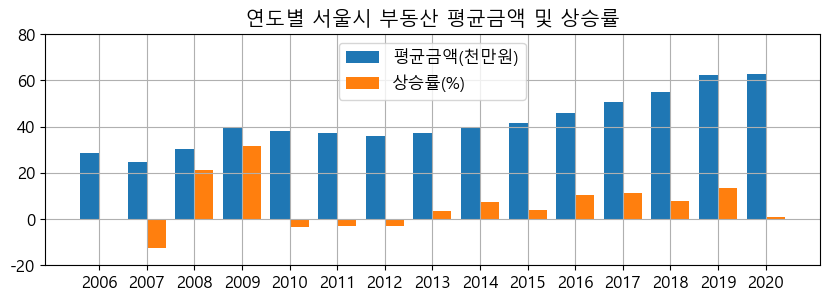

In [101]:
year_price = price.groupby('신고년도')['물건금액'].mean().reset_index()
year_price['평균금액(단위:천만원)'] = year_price['물건금액']/10000000
year_price['전년대비 상승률(%)'] = year_price['평균금액(단위:천만원)'].pct_change()*100
#그래프 그리기
bar_width = 0.4
plt.figure(figsize=(10,3))
plt.bar(year_price['신고년도']-bar_width/2, year_price['평균금액(단위:천만원)'], bar_width)
plt.bar(year_price['신고년도']+bar_width/2, year_price['전년대비 상승률(%)'], bar_width)
plt.xticks(year_price['신고년도'])
plt.grid()
plt.legend(['평균금액(천만원)','상승률(%)'], loc='best')
plt.title('연도별 서울시 부동산 평균금액 및 상승률')
plt.ylim([-20, 80])
plt.show()

### 정권별 서울시 부동산 가격 변동 그래프

> ### 대통령 재임기간
> * 16대 노무현 : 2003.02 ~ 2008.02
> * 17대 이명박 : 2008.02 ~ 2013.02
> * 18대 박근혜 : 2013.02 ~ 2017.03
> * 19대 문재인 : 2017.05 ~

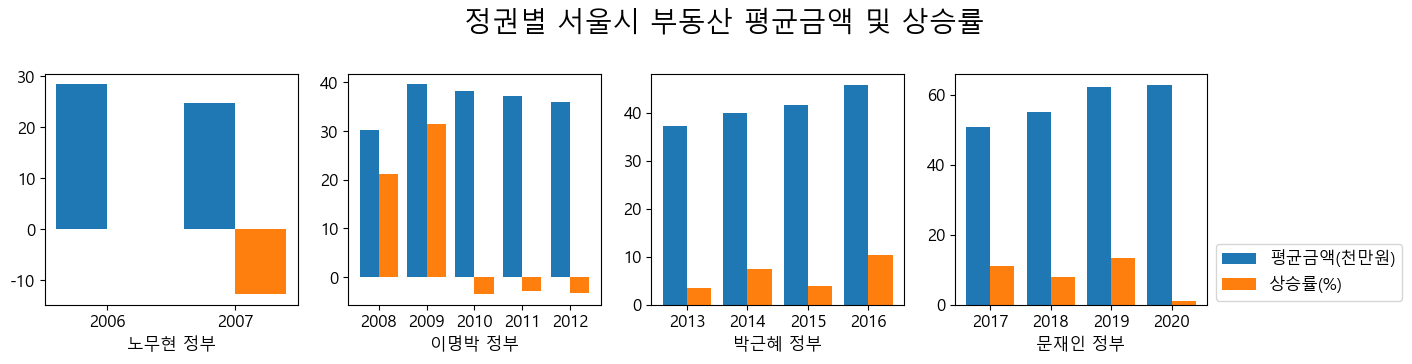

In [102]:
#정권별 데이터 구분
no = year_price[year_price['신고년도'].isin([2006,2007])]
lee = year_price[year_price['신고년도'].isin([2008,2009,2010,2011,2012])]
park = year_price[year_price['신고년도'].isin([2013,2014,2015,2016])]
moon = year_price[year_price['신고년도'].isin([2017,2018,2019,2020])]

#정권별 구분 그래프
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

ax1.bar(no['신고년도']-bar_width/2, no['평균금액(단위:천만원)'], bar_width)
ax1.bar(no['신고년도']+bar_width/2, no['전년대비 상승률(%)'], bar_width)
ax1.set_xlabel('노무현 정부')
ax1.set_xticks(no['신고년도'])

ax2.bar(lee['신고년도']-bar_width/2, lee['평균금액(단위:천만원)'], bar_width)
ax2.bar(lee['신고년도']+bar_width/2, lee['전년대비 상승률(%)'], bar_width)
ax2.set_xlabel('이명박 정부')
ax2.set_xticks(lee['신고년도'])

ax3.bar(park['신고년도']-bar_width/2, park['평균금액(단위:천만원)'], bar_width)
ax3.bar(park['신고년도']+bar_width/2, park['전년대비 상승률(%)'], bar_width)
ax3.set_xlabel('박근혜 정부')

ax4.bar(moon['신고년도']-bar_width/2, moon['평균금액(단위:천만원)'], bar_width)
ax4.bar(moon['신고년도']+bar_width/2, moon['전년대비 상승률(%)'], bar_width)
ax4.set_xlabel('문재인 정부')

ax3.set_title('정권별 서울시 부동산 평균금액 및 상승률           \n', fontsize=20)
plt.legend(['평균금액(천만원)','상승률(%)'], loc='best', bbox_to_anchor=(1.0,0.3))
plt.show()

### 정권별 부동산 총 상승률 및 평균 상승률

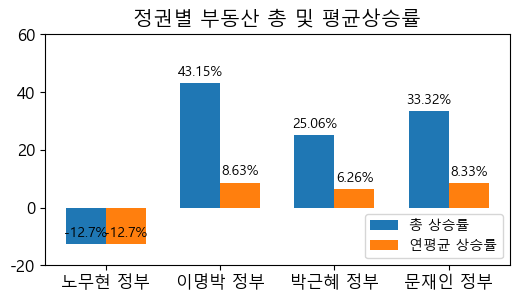

In [103]:
import numpy as np
gov_name = ['노무현 정부','이명박 정부','박근혜 정부','문재인 정부']
gov_sumrate = [no['전년대비 상승률(%)'].sum(),
        lee['전년대비 상승률(%)'].sum(), 
        park['전년대비 상승률(%)'].sum(),
        moon['전년대비 상승률(%)'].sum()]
gov_meanrate = [no['전년대비 상승률(%)'].mean(),
        lee['전년대비 상승률(%)'].mean(), 
        park['전년대비 상승률(%)'].mean(),
        moon['전년대비 상승률(%)'].mean()]
temp_x = np.arange(len(gov_name))
bar_width = 0.35

colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
fig, ax = plt.subplots(figsize=(6,3))
rects1 = ax.bar(temp_x-bar_width/2, gov_sumrate, bar_width)
rects2 = ax.bar(temp_x+ bar_width/2, gov_meanrate, bar_width)
ax.set_ylim([-20, 60])
ax.set_title('정권별 부동산 총 및 평균상승률')
ax.legend(['총 상승률','연평균 상승률'], loc='lower right', prop={'size': 10})
ax.set_xticks(temp_x)
ax.set_xticklabels(gov_name)

for rect in rects1:
    height = rect.get_height()
    plt.annotate(str(round(height,2))+'%',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", size=10,
                ha='center', va='bottom')
for rect in rects2:
    height = rect.get_height()
    plt.annotate(str(round(height,2))+'%',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", size=10,
                ha='center', va='bottom')

plt.show()

### 번외(연도별 건물유형의 평균 가격 변동 그래프)

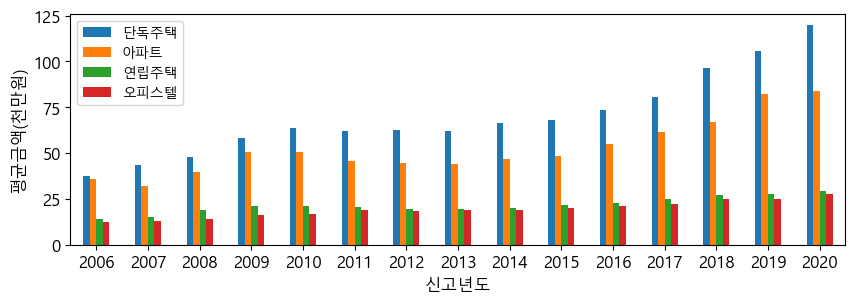

In [104]:
type_price = price.groupby(['신고년도','건물주용도'])['물건금액'].mean().reset_index()
type_price['물건금액'] = type_price['물건금액']/10000000
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
pivot = type_price.pivot_table(index='신고년도', columns='건물주용도')
pivot.plot.bar(figsize=(10,3), rot=False)
plt.ylabel('평균금액(천만원)')
plt.legend(['단독주택','아파트','연립주택','오피스텔'], prop={'size':10})
plt.show()

# 머신러닝

### 데이터 변환(명목형 -> 숫자형)

In [105]:
def racoding_encoder(table):
    from sklearn.preprocessing import LabelEncoder
    import pandas as pd
    table2 = table.copy()
    try:
        for i in table2.columns[table2.dtypes=='object']:
            encoder = LabelEncoder()
            encoder.fit(table2[i])
            table2[i] = encoder.transform(table2[i])
        return table2
    except:
        encoder = LabelEncoder()
        encoder.fit(table)
        table2 = encoder.transform(table)
    return pd.DataFrame({table.name:table2})
price2 = racoding_encoder(price)
price2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2261710 entries, 0 to 176000
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   신고년도    int64  
 1   자치구명    int32  
 2   법정동명    int32  
 3   건물면적    float64
 4   층정보     float64
 5   건물주용도   int32  
 6   건축년도    float64
 7   물건금액    int64  
dtypes: float64(3), int32(3), int64(2)
memory usage: 129.4 MB


### 컬럼별 상관관계 확인

In [106]:
price2.corr('pearson')

,신고년도,자치구명,법정동명,건물면적,층정보,건물주용도,건축년도,물건금액
신고년도,1.000000,0.008877,-0.001457,0.017429,0.065801,-0.016801,-0.020402,0.255714
자치구명,0.008877,1.000000,0.066388,0.016661,-0.012447,-0.010344,-0.041855,0.000108
법정동명,-0.001457,0.066388,1.000000,0.010837,-0.022790,-0.001902,0.009300,-0.007823
건물면적,0.017429,0.016661,0.010837,1.000000,-0.028237,-0.491298,-0.032461,0.595386
층정보,0.065801,-0.012447,-0.022790,-0.028237,1.000000,-0.074628,-0.115356,0.188887
건물주용도,-0.016801,-0.010344,-0.001902,-0.491298,-0.074628,1.000000,0.101281,-0.387153
건축년도,-0.020402,-0.041855,0.009300,-0.032461,-0.115356,0.101281,1.000000,-0.090889
물건금액,0.255714,0.000108,-0.007823,0.595386,0.188887,-0.387153,-0.090889,1.000000


<AxesSubplot:>

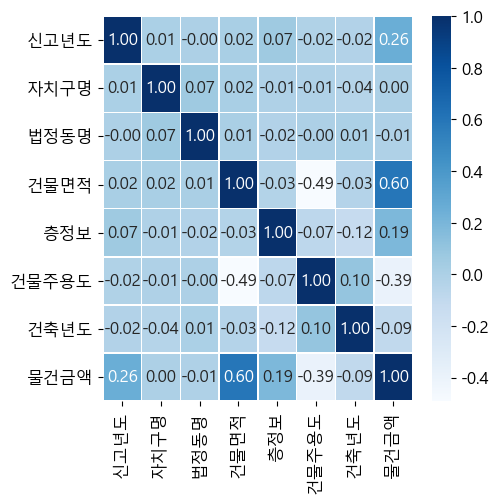

In [107]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(data = price2.corr('pearson'), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

### 데이터 분리

In [108]:
x = price2[price2['신고년도']!=2020]
y = price2[price2['신고년도']==2020]

### 모델 선택, 생성, 예측, 결과

In [109]:
from sklearn.linear_model import LinearRegression
import time
import datetime
import numpy as np

def mae(x, y):
        return np.mean(abs(x-y))

start = time.time()
model = LinearRegression()
model.fit(x.iloc[:,:-1], x['물건금액'])
result = model.predict(y.iloc[:,:-1])
sec = time.time()-start
times = str(datetime.timedelta(seconds=sec)).split(".")
times = times[0]
mae_r = round(mae(result, y['물건금액']),2)
cor = round(np.corrcoef(result, y['물건금액'])[0][1],2)

print('러닝타임:{} / MAE:{} / 상관계수:{}'.format(times,mae_r,cor))

러닝타임:0:00:00 / MAE:259528853.19 / 상관계수:0.7


### 모델 성능 개선

In [110]:
def racoding_regressor_selector(x_train, y_train, x_test, y_test):
    from sklearn.linear_model import LinearRegression
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.linear_model import Lasso
    from sklearn.ensemble import RandomForestRegressor
    import time
    import datetime
    import numpy as np
    print('시작시간:{}'.format(time.strftime('%H:%M:%S')))
    def mae(x, y):
        return np.mean(abs(x-y))

    def learning(name, model):
        start = time.time()
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        sec = time.time()-start
        times = str(datetime.timedelta(seconds=sec)).split(".")
        times = times[0]
        mae_r = round(mae(pred, y_test),2)
        cor = round(np.corrcoef(pred, y_test)[0][1],2)
        print('{} / 러닝타임:{} / MAE:{} / 상관계수:{}'.format(name,times,mae_r,cor))
 
    lr = LinearRegression()
    knn = KNeighborsRegressor()
    dr = DecisionTreeRegressor()
    ls = Lasso()
    rf = RandomForestRegressor()
    model = ['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor',
            'Lasso','RandomForestRegressor']
    models = [lr, knn, dr, ls, rf]
    for i, j in zip(model, models):
        learning(i, j)
    print('종료시간:{}'.format(time.strftime('%H:%M:%S')))

racoding_regressor_selector(x.iloc[:,:-1], x['물건금액'], y.iloc[:,:-1], y['물건금액'])

시작시간:17:24:52
LinearRegression / 러닝타임:0:00:00 / MAE:259528853.19 / 상관계수:0.7
KNeighborsRegressor / 러닝타임:0:00:37 / MAE:141233305.57 / 상관계수:0.9
DecisionTreeRegressor / 러닝타임:0:00:11 / MAE:128639586.03 / 상관계수:0.89
Lasso / 러닝타임:0:00:01 / MAE:259528853.59 / 상관계수:0.7
RandomForestRegressor / 러닝타임:0:13:25 / MAE:114016876.71 / 상관계수:0.93
종료시간:17:39:07


In [111]:
# #하이퍼 파라미터 찾기
# import time
# import datetime
# from sklearn.ensemble import RandomForestRegressor
# print(time.strftime('%H:%M:%S'))
# def mae(x, y):
#     return np.mean(abs(x-y))
# for i in range(100, 600, 100):
#     start = time.time()
#     model = RandomForestRegressor(n_estimators=i)
#     model.fit(x.iloc[:,:-1], x['물건금액'])
#     result = model.predict(y.iloc[:,:-1])
#     sec = time.time()-start
#     times = str(datetime.timedelta(seconds=sec)).split(".")
#     times = times[0]
#     mae_r = round(mae(result, y['물건금액']),2)
#     cor = round(np.corrcoef(result, y['물건금액'])[0][1],2)
#     print('파라미터:{} / MAE:{} / 상관계수:{} / 시간:{}'.format(i, mae_r, cor, times))

### 실전 테스트 자료 생성

In [112]:
goo = pd.concat([price.자치구명, price2.자치구명], axis=1)
goo.columns = ['자치구명1','자치구명2']
goo[goo['자치구명1']=='서초구'] #강남구:0, 용산구:20, 서초구:14

,자치구명1,자치구명2
132126,서초구,14
132128,서초구,14
132130,서초구,14
132132,서초구,14
132134,서초구,14
...,...,...
67541,서초구,14
67542,서초구,14
67543,서초구,14
69036,서초구,14


In [113]:
dong = pd.concat([price.법정동명, price2.법정동명], axis=1)
dong.columns = ['법정동명1','법정동명2']
dong.head()

,법정동명1,법정동명2
0,신정동,238
1,천호동,371
2,목동,129
3,길동,42
4,신정동,238


In [114]:
gun = pd.concat([price.건물주용도, price2.건물주용도], axis=1)
gun.columns = ['건물주용도1','건물주용도2']
gun.head()

,건물주용도1,건물주용도2
0,아파트,1
1,연립주택,2
2,아파트,1
3,아파트,1
4,아파트,1


In [115]:
#국토교통부 실거래가 공개시스템 10건
test = pd.DataFrame({
    '신고년도':[2021,2021,2021,2021,2021, 2021, 2021, 2021, 2021, 2021],
    '자치구명':[20, 20, 2, 2, 14, 14, 4, 4, 1, 1],
    '법정동명':[297, 221, 151, 215, 198, 335, 229, 53, 7, 111],
    '건물면적':[72.66, 48.64, 149.76, 25.5, 23.88, 84.53, 50.02, 418.26, 59.51, 24.95],
    '층정보':[5, 4, 1, 2, 7, 8, 3, 1, 6, 5],
    '건물주용도':[1, 2, 0, 3, 1, 1, 2, 0, 3, 3],
    '건축년도':[1982, 2007, 1993, 2010, 2019, 1987, 1991, 1996, 2019, 2014],
    '물건금액':[720000000,485000000,470000000,83000000,400000000,2000000000,252000000,2030000000,480000000,160000000]
})
test

,신고년도,자치구명,법정동명,건물면적,층정보,건물주용도,건축년도,물건금액
0,2021,20,297,72.66,5,1,1982,720000000
1,2021,20,221,48.64,4,2,2007,485000000
2,2021,2,151,149.76,1,0,1993,470000000
3,2021,2,215,25.50,2,3,2010,83000000
4,2021,14,198,23.88,7,1,2019,400000000
5,2021,14,335,84.53,8,1,1987,2000000000
6,2021,4,229,50.02,3,2,1991,252000000
7,2021,4,53,418.26,1,0,1996,2030000000
8,2021,1,7,59.51,6,3,2019,480000000
9,2021,1,111,24.95,5,3,2014,160000000


In [116]:
goo[goo.자치구명1=='강동구'].head(2)

,자치구명1,자치구명2
1,강동구,1
3,강동구,1


In [117]:
dong[dong.법정동명1=='둔촌동'].head(2)

,법정동명1,법정동명2
13,둔촌동,111
35,둔촌동,111


In [118]:
gun[gun.건물주용도1=='오피스텔'].head(2)
#단독주택0, 아파트1, 연립주택2, 오피스텔3

,건물주용도1,건물주용도2
9,오피스텔,3
11,오피스텔,3


### 실전 테스트

In [119]:
from sklearn.ensemble import RandomForestRegressor
import time
import datetime
import numpy as np

def mae(x, y):
        return np.mean(abs(x-y))

start = time.time()
model2 = RandomForestRegressor()
model2.fit(price2.iloc[:,:-1], price2['물건금액'])
result2 = model2.predict(test.iloc[:,:-1])
sec = time.time()-start
times = str(datetime.timedelta(seconds=sec)).split(".")
times = times[0]
mae_r = round(mae(result2, test['물건금액']),2)
cor = round(np.corrcoef(result2, test['물건금액'])[0][1],2)

print('러닝타임:{} / MAE:{} / 상관계수:{}'.format(times,mae_r,cor))

러닝타임:0:13:40 / MAE:101381569.48 / 상관계수:1.0


In [120]:
test.물건금액 - result2

0    1.678392e+08
1    3.645500e+07
2    5.553000e+07
3   -2.603538e+07
4   -1.512500e+07
5    1.844167e+08
6   -5.741000e+07
7    3.603680e+08
8    8.178629e+07
9    2.885020e+07
Name: 물건금액, dtype: float64